# Predicción del aterrizaje de la primera etapa del Falcon 9 de SpaceX
## Tarea: Exploración y preparación de datos
En esta tarea, predeciremos si la primera etapa del Falcon 9 aterrizará con éxito. SpaceX anuncia lanzamientos de cohetes Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores cuestan más de 165 millones de dólares cada uno; gran parte de los ahorros se deben al hecho de que SpaceX puede reutilizar la primera etapa.

En este laboratorio, realizarás análisis exploratorio de datos e ingeniería de características.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

### Análisis exploratorio de datos
Primero, leamos el conjunto de datos de SpaceX en un marco de datos de Pandas e imprimamos su resumen

In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
dataset_part_2_csv = io.BytesIO(response.content)
df = pd.read_csv(dataset_part_2_csv)
print(df.head(5))

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

En primer lugar, intentemos ver cómo las variables FlightNumber (que indica los intentos de lanzamiento continuos) y Payload afectarían el resultado del lanzamiento.

Podemos representar gráficamente FlightNumber vs PayloadMass y superponer el resultado del lanzamiento. Vemos que a medida que aumenta el número de vuelo, es más probable que la primera etapa aterrice con éxito. La masa de la carga útil también parece ser un factor; incluso con cargas útiles más pesadas, la primera etapa suele regresar con éxito.

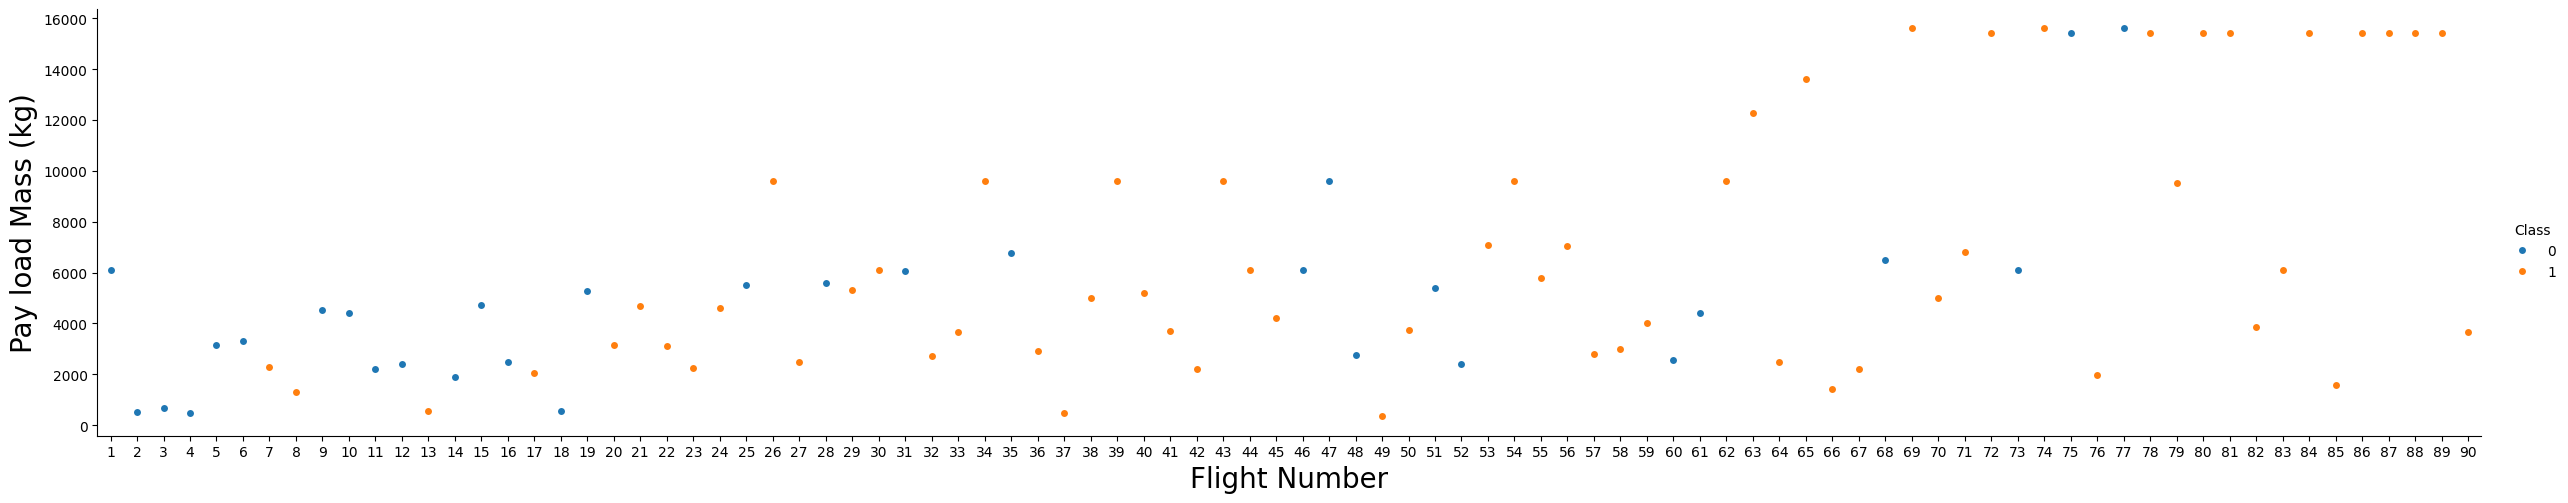

In [7]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

A continuación, analicemos en profundidad cada sitio para visualizar sus registros de lanzamiento detallados.

### TAREA 1: Visualizar la relación entre el Flight Number y el Launch Site
Utilice la función <code>catplot</code> para trazar <code>FlightNumber</code> vs <code>LaunchSite</code>, establezca el parámetro <code>x</code> en <code>FlightNumber</code>, establezca <code>y</code> en <code>Launch Site</code> y establezca el parámetro <code>hue</code> en <code>'class'</code>

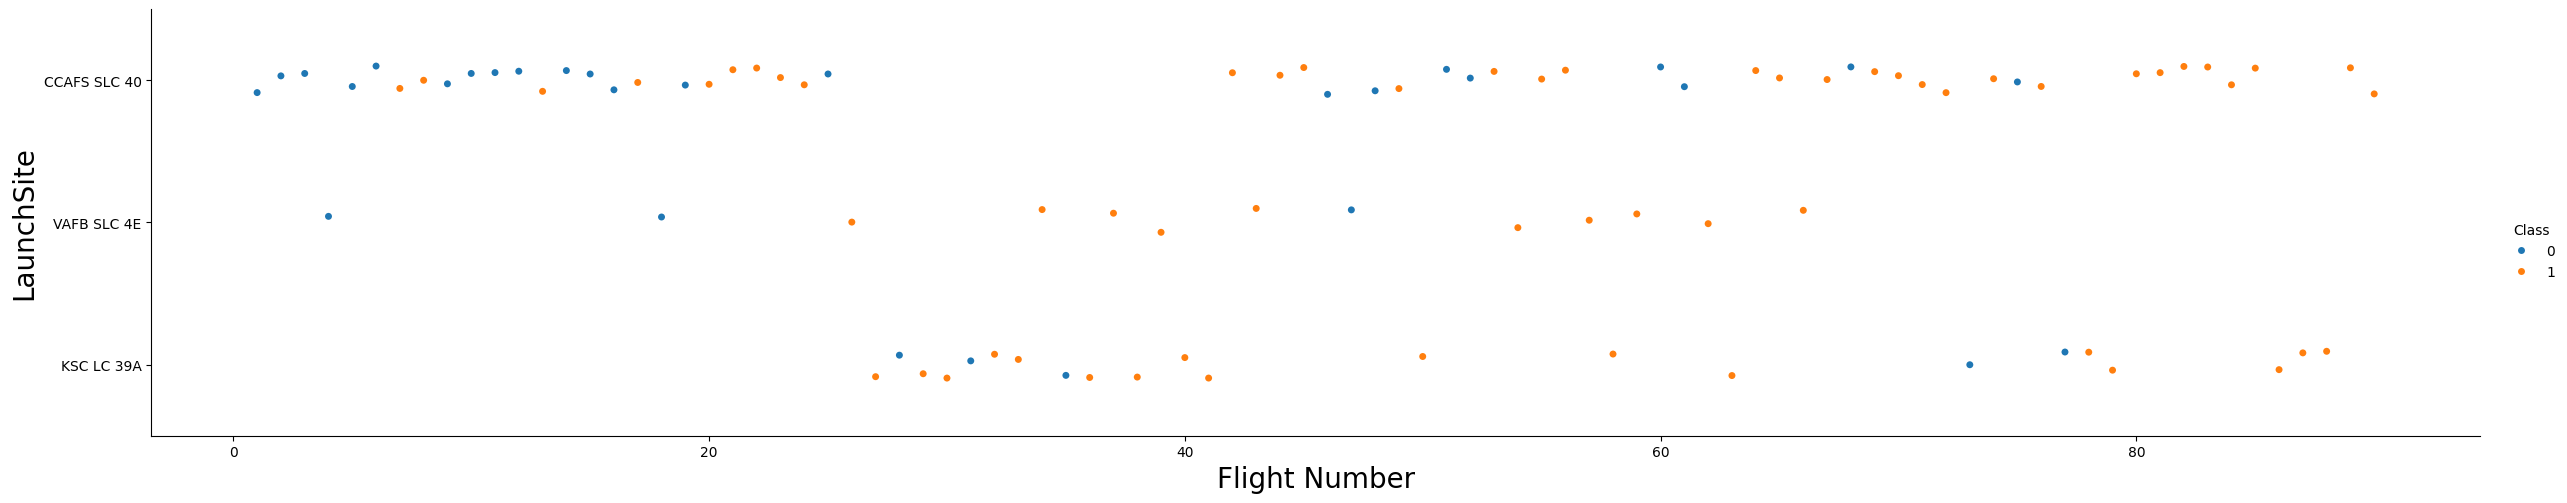

In [8]:
# Dibuje un gráfico de puntos de dispersión con el eje x como FlightNumber, el eje y como Launch Site y el tono como valor de clase.
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Ahora intenta explicar los patrones que encontraste en los gráficos de puntos de dispersión del número de vuelo frente al sitio de lanzamiento.

R: Del gráfico se observa que se realizaron más vuelos desde CCAFS SLC 40, mientras que se obtuvieron menores tasas de éxito en las otras dos plataformas de vuelo. Adicional a esto se observa que existe relación entre la plataforma de vuelo y el resultado.

### TAREA 2: Visualizar la relación entre la masa de la carga útil y el sitio de lanzamiento
También queremos observar si existe alguna relación entre los sitios de lanzamiento y su masa de carga útil.

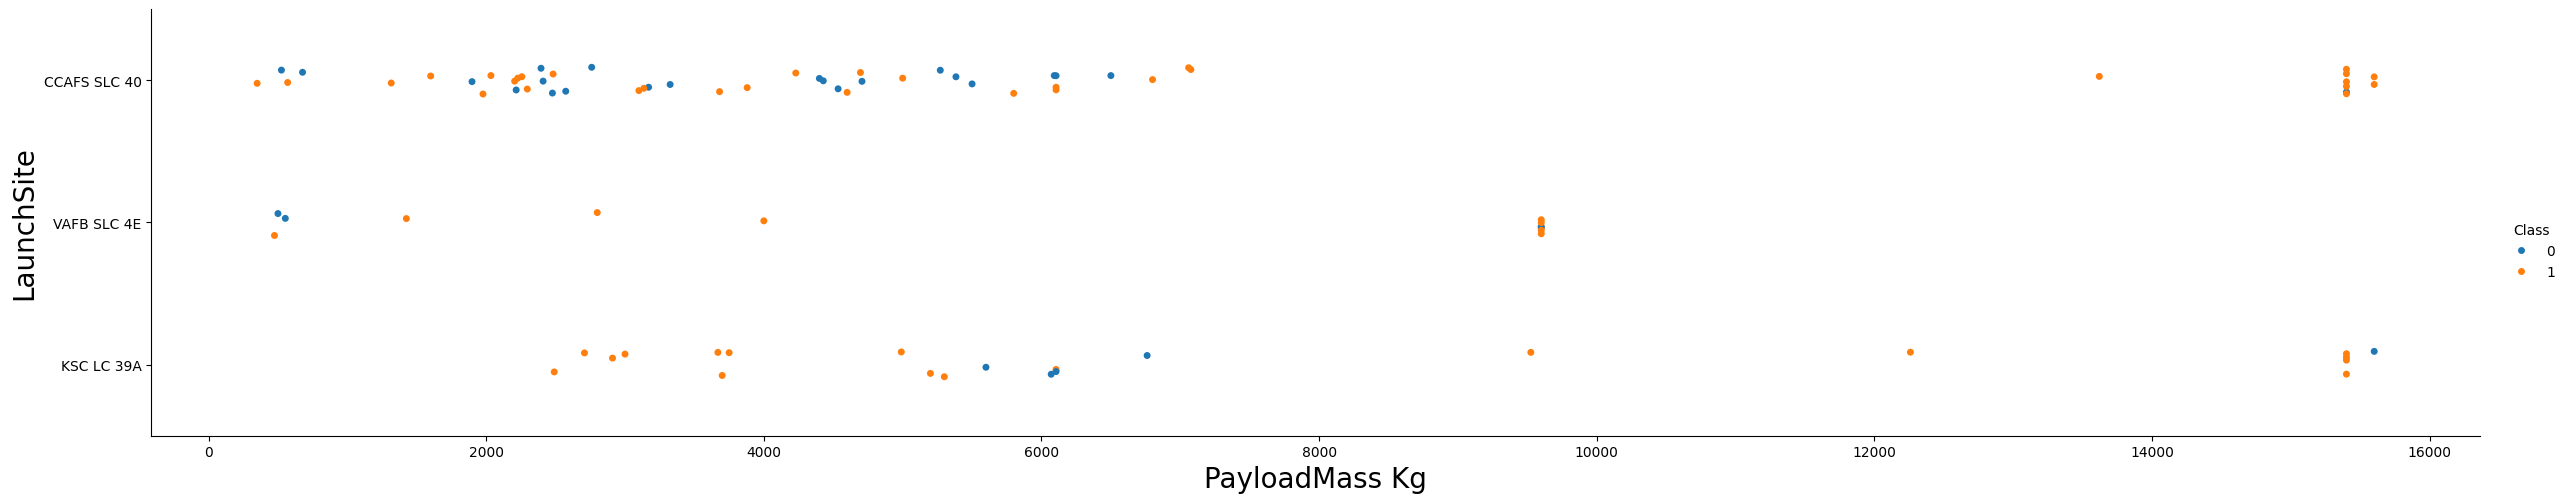

In [9]:
# Dibuje un diagrama de puntos de dispersión con el eje x como masa de carga útil (kg) y el eje y como sitio de lanzamiento, y el tono como valor de clase.
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass Kg",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Ahora, si observa el gráfico de puntos de dispersión de Payload Mass versus Launch Site, encontrará que para el sitio de lanzamiento VAFB-SLC no se lanzaron cohetes para una masa de carga útil pesada (superior a 10 000).

### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita
A continuación, queremos comprobar visualmente si existe alguna relación entre la success y el orbit type.

Creemos un gráfico de barras para la tasa de éxito de cada órbita

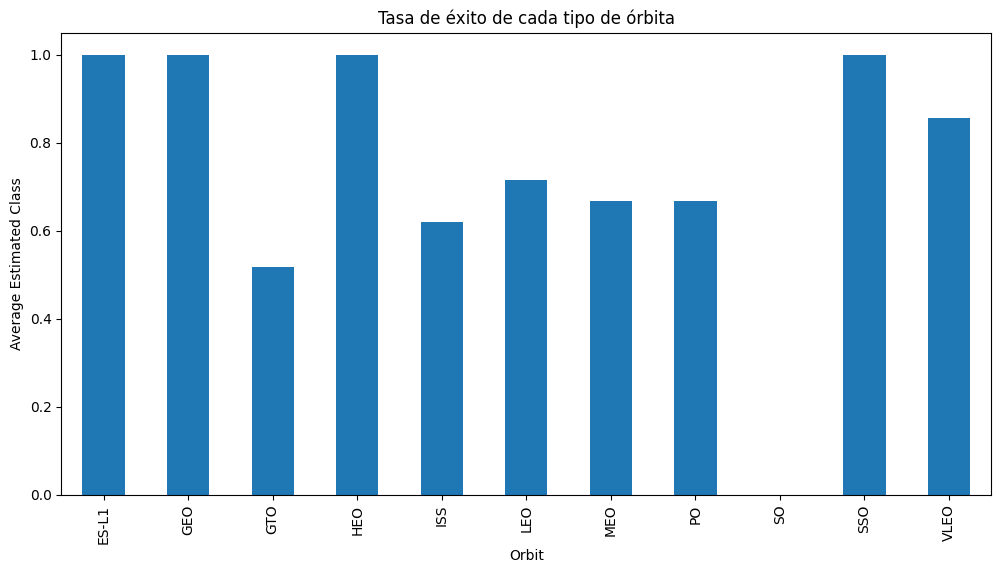

In [11]:
# SUGERENCIA: use el método groupby en la columna Órbita y obtenga la media de la columna Clase
df_orbit= df.groupby('Orbit')['Class'].mean()

# Graficamos los datos
df_orbit.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Orbit')
plt.ylabel('Average Estimated Class')
plt.title('Tasa de éxito de cada tipo de órbita')
plt.show()

Analice el gráfico de barras trazado para identificar qué órbitas tienen las tasas de éxito más altas.

### TAREA 4: Visualizar la relación entre FlightNumber y el tipo de órbita
Para cada órbita, queremos ver si existe alguna relación entre FlightNumber y el tipo de órbita.

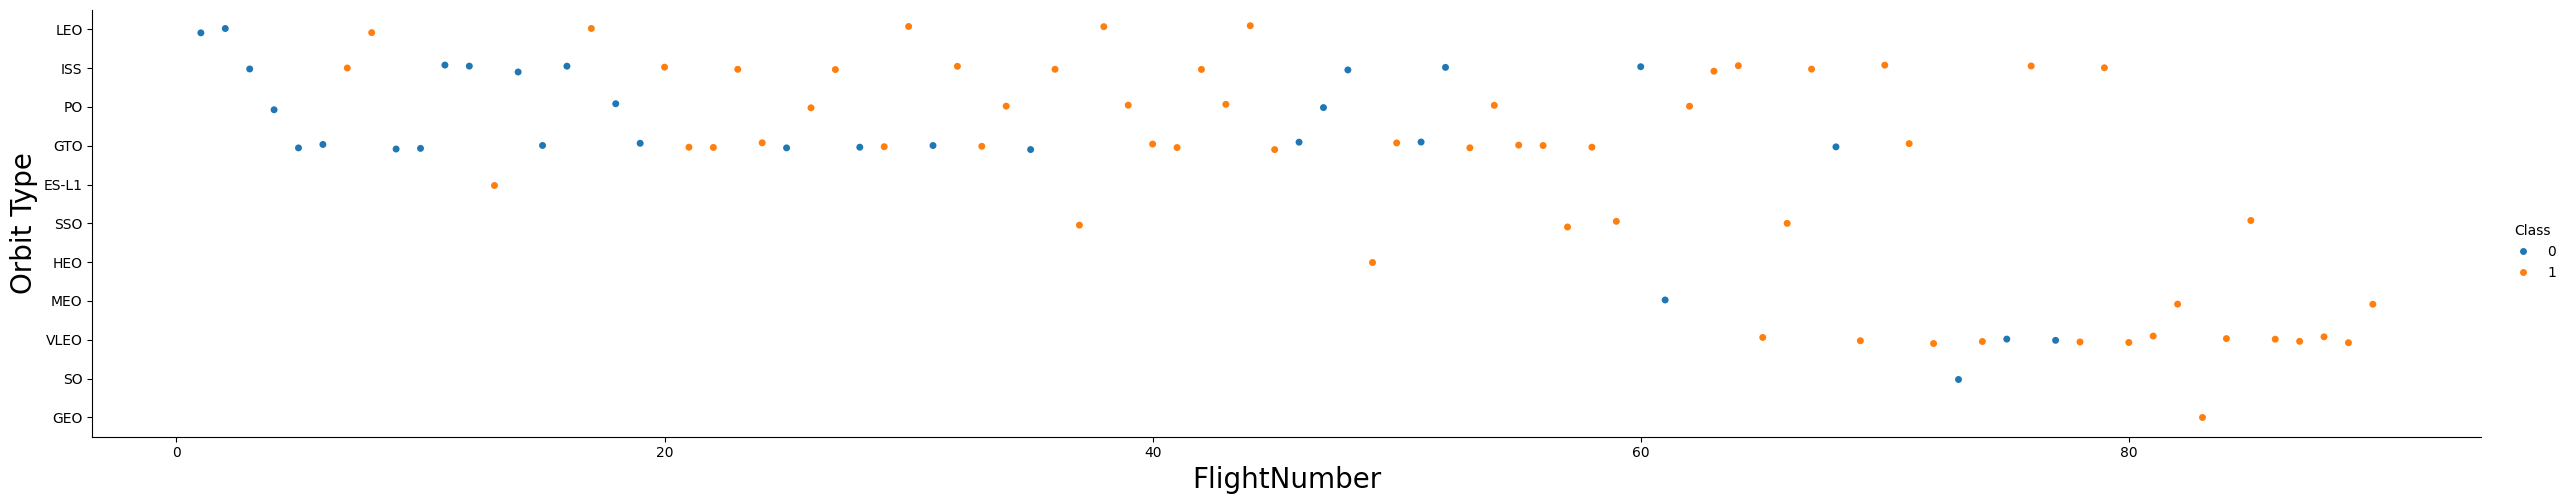

In [12]:
# Dibuje un gráfico de puntos de dispersión con el eje x como FlightNumber y el eje y como la órbita, y el tono como el valor de la clase.
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

Se puede observar que en la órbita LEO, el éxito parece estar relacionado con el número de vuelos. Por el contrario, en la órbita GTO, no parece haber relación entre el número de vuelos y el éxito.

### TAREA 5: Visualizar la relación entre la masa de la carga útil y el tipo de órbita
De manera similar, podemos trazar gráficos de puntos de dispersión de la masa de la carga útil frente a la órbita para revelar la relación entre la masa de la carga útil y el tipo de órbita

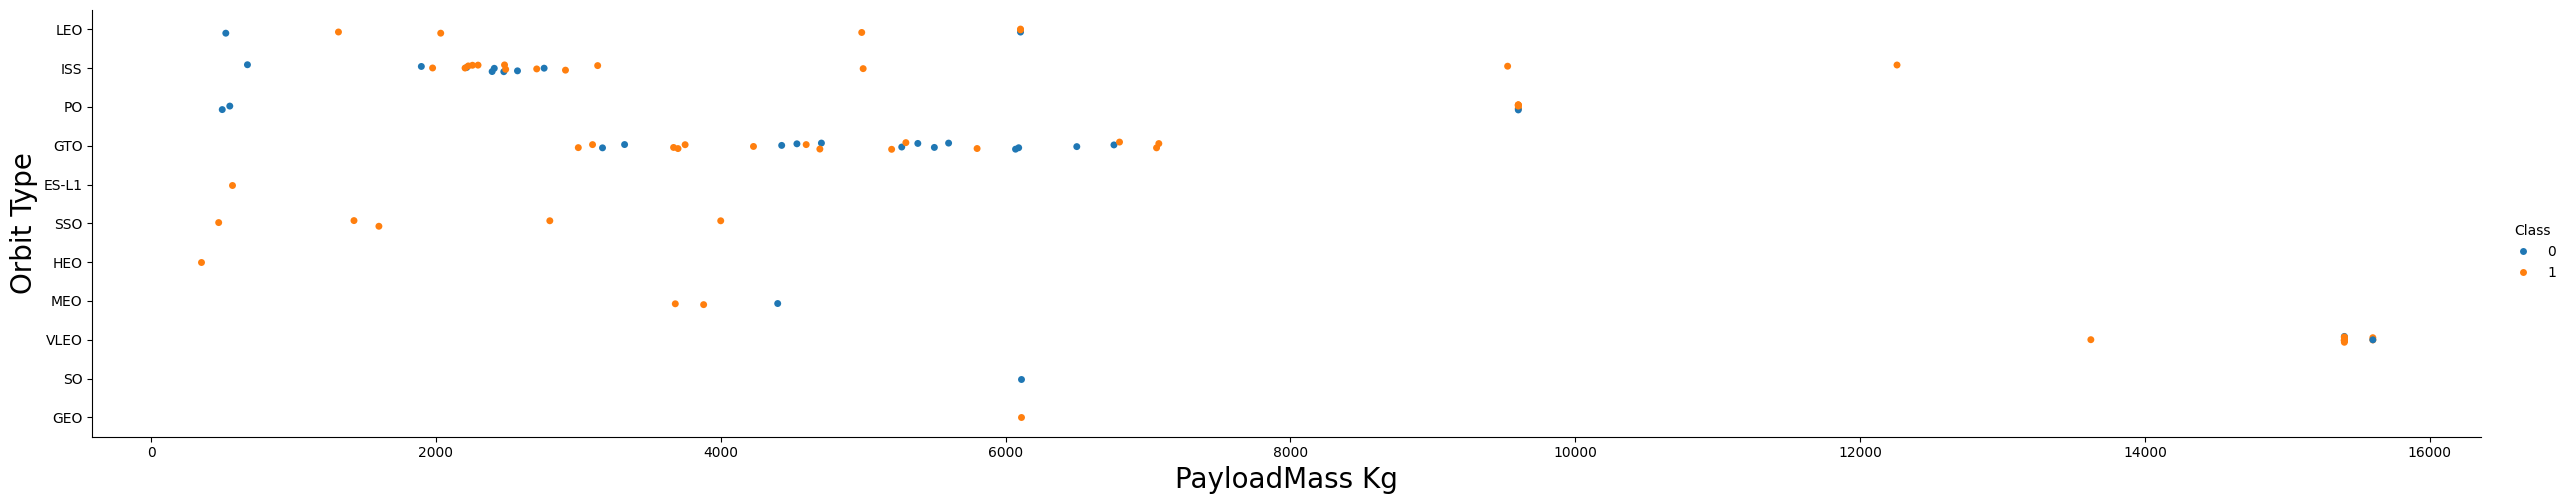

In [13]:
# Dibuje un gráfico de puntos de dispersión con el eje x como masa de carga útil, el eje y como órbita y el tono como valor de clase.
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass Kg",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

Con cargas útiles pesadas, la tasa de aterrizajes exitosos o de aterrizajes positivos es mayor en el caso de la órbita polar, la órbita baja y la Estación Espacial Internacional.

Sin embargo, en el caso de la Tierra Media, es difícil distinguir entre aterrizajes exitosos y fallidos, ya que ambos resultados están presentes.

### TAREA 6: Visualizar la tendencia anual de éxito de lanzamiento
Puede trazar un gráfico de líneas con el eje x como Año y el eje y como la tasa de éxito promedio, para obtener la tendencia de éxito de lanzamiento promedio.

La función le ayudará a obtener el año a partir de la fecha:

In [14]:
# Una función para extraer años de la fecha
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


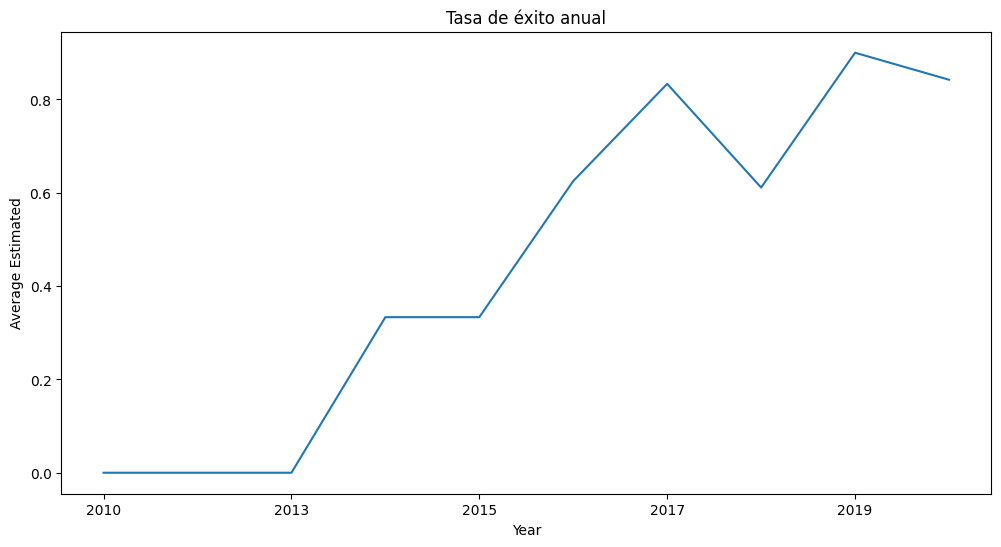

In [22]:
# Dibuje un gráfico de líneas con el eje x como el año extraído y el eje y como la tasa de éxito
plt.figure(figsize=(12, 6))

df_year = df.groupby('Date')['Class'].mean()
df_year.plot(x=df_year.index, y=df_year.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated')
plt.title('Tasa de éxito anual')
plt.show()

Se puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2020.

#### Ingeniería de características
A esta altura, ya debería tener algunas ideas preliminares sobre cómo cada variable importante afectaría la tasa de éxito. Seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.

In [15]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TAREA 7: Crear variables ficticias para columnas categóricas
Utilice la función <code>get_dummies</code> y el marco de datos <code>features</code> para aplicar OneHotEncoder a las columnas <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code> y <code>Serial</code>. Asigne el valor a la variable <code>features_one_hot</code> y muestre los resultados utilizando el método head. El marco de datos de resultados debe incluir todas las funciones, incluidas las codificadas.

In [26]:
# SUGERENCIA: Utilice la función get_dummies() en las columnas categóricas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TAREA 8: Convertir todas las columnas numéricas a float64
Ahora que nuestro marco de datos <code>features_one_hot</code> solo contiene números, convierta todo el marco de datos al tipo de variable <code>float64</code>

In [28]:
# SUGERENCIA: use la función astype
features_one_hot = features_one_hot.astype('Float64')
features_one_hot.dtypes

FlightNumber    Float64
PayloadMass     Float64
Flights         Float64
GridFins        Float64
Reused          Float64
                 ...   
Serial_B1056    Float64
Serial_B1058    Float64
Serial_B1059    Float64
Serial_B1060    Float64
Serial_B1062    Float64
Length: 80, dtype: object